In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import lightgbm

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
rep_cols = {'ID':'ID', 
 '板温':'board_t', 
 '现场温度':'env_t', 
 '光照强度':'light_strength', 
 '转换效率':'efficiency', 
 '转换效率A':'efficiency_A', 
 '转换效率B':'efficiency_B', 
 '转换效率C':'efficiency_C', 
 '电压A':'V_A',
 '电压B':'V_B', 
 '电压C':'V_C', 
 '电流A':'I_A', 
 '电流B':'I_B', 
 '电流C':'I_C', 
 '功率A':'P_A', 
 '功率B':'P_B', 
 '功率C':'P_C', 
 '平均功率':'P_avg', 
 '风速':'wind_speed',
 '风向':'wind_direction', 
 '发电量':'y'
}

In [3]:
def my_val(preds, train_data):
    label = train_data.get_label()
    return 'score', 1/(1+np.sqrt(mean_squared_error(preds, label))), True
def my_obj(preds, train_data):
    labels = train_deata.get_label()

In [4]:
train = pd.read_csv('../data/public_raw.train.csv')
test = pd.read_csv('../data/public_raw.test.csv')

train_len = train.shape[0]

train['is_train']=1
test['is_train']=0

df = pd.concat([train, test],sort=False)

In [5]:
df.rename(index=str, columns=rep_cols, inplace=True)

In [6]:
df.head()

,ID,board_t,env_t,light_strength,efficiency,efficiency_A,efficiency_B,efficiency_C,V_A,V_B,...,I_B,I_C,P_A,P_B,P_C,P_avg,wind_speed,wind_direction,y,is_train
0,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,...,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272,1.437752,1
1,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,...,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275,1.692575,1
2,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,...,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283,1.975787,1
3,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,...,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280,2.370656,1
4,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,...,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280,2.532091,1


In [7]:
df.tail()

,ID,board_t,env_t,light_strength,efficiency,efficiency_A,efficiency_B,efficiency_C,V_A,V_B,...,I_B,I_C,P_A,P_B,P_C,P_avg,wind_speed,wind_direction,y,is_train
8404,17869,35.64,24.6,552,21.07,21.71,23.81,17.69,599,593,...,7.28,5.40,3935.43,4317.04,3207.60,3820.02,3.2,218,NaN,0
8405,17870,35.89,24.5,801,18.03,18.02,17.72,18.36,593,593,...,7.87,8.18,4744.00,4666.91,4834.38,4748.43,5.7,272,NaN,0
8406,17871,36.64,24.7,792,17.90,17.74,17.92,18.05,591,590,...,7.93,7.99,4633.44,4678.70,4714.10,4675.41,5.4,187,NaN,0
8407,17872,36.51,24.9,789,17.61,17.62,17.52,17.68,592,591,...,7.71,7.83,4582.08,4556.61,4596.21,4578.30,6.7,234,NaN,0
8408,17875,36.31,25.1,752,17.69,17.60,17.55,17.92,592,593,...,7.33,7.52,4357.12,4346.69,4436.80,4380.20,3.1,250,NaN,0


In [8]:
df.sort_values(by=['ID'],ascending=True, inplace=True)

In [9]:
df.head(30)

,ID,board_t,env_t,light_strength,efficiency,efficiency_A,efficiency_B,efficiency_C,V_A,V_B,...,I_B,I_C,P_A,P_B,P_C,P_avg,wind_speed,wind_direction,y,is_train
0,1,0.01,0.1,1,0.00,0.00,0.00,0.00,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.1,1,NaN,0
1,9,-19.33,-17.5,13,198.32,259.11,42.17,293.66,722,705,...,0.21,1.43,909.72,148.05,1031.03,696.27,0.3,273,NaN,0
0,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,...,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272,1.437752,1
1,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,...,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275,1.692575,1
2,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,...,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283,1.975787,1
2,13,-16.68,-16.6,50,73.59,97.95,14.70,108.12,729,715,...,0.28,2.02,1334.07,200.20,1472.58,1002.28,0.9,277,NaN,0
3,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,...,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280,2.370656,1
4,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,...,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280,2.532091,1
5,16,-14.10,-16.2,76,61.97,77.59,25.80,82.53,733,728,...,0.74,2.38,1619.93,538.72,1723.12,1293.92,0.9,278,2.779719,1
3,17,-13.27,-16.2,83,75.36,73.55,73.36,79.16,728,723,...,2.32,2.50,1681.68,1677.36,1810.00,1723.01,0.7,280,NaN,0


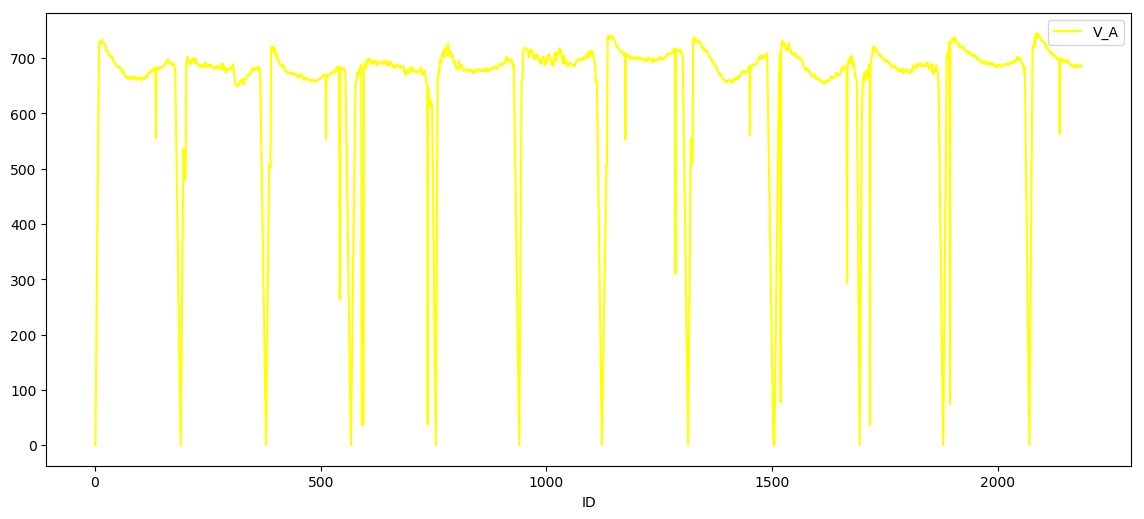

In [42]:
light_id=df.head(2000)

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

light_id[light_id['V_A']<60000].plot(x='ID',y='V_A',color='yellow',ax=ax)
# light_id.plot(x='ID',y='y',secondary_y=True,color='red',ax=ax)

plt.show()



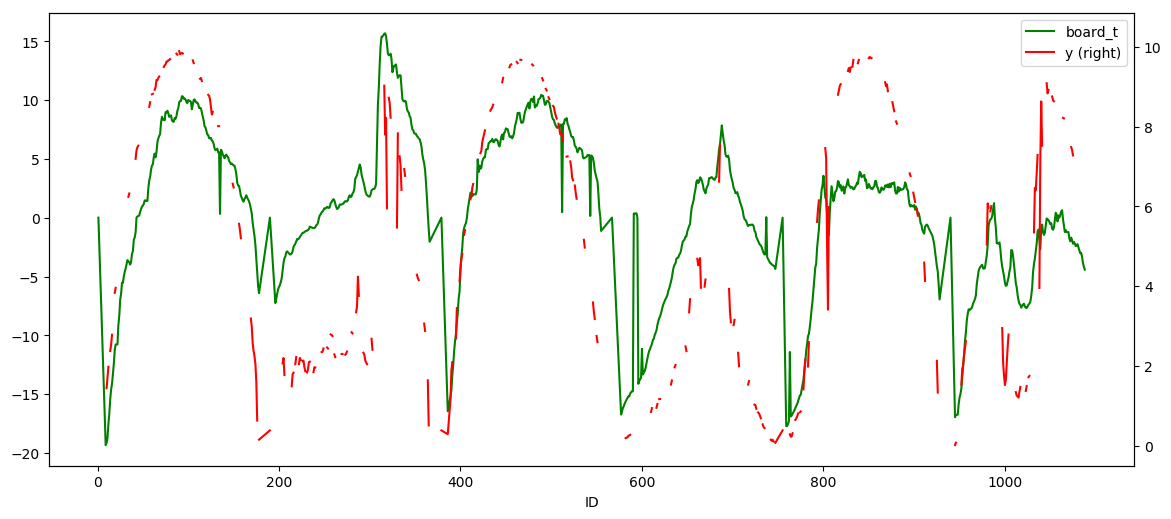

In [11]:
t_id=df.head(1000)

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

light_id.plot(x='ID',y='board_t',color='green',ax=ax)
light_id.plot(x='ID',y='y',secondary_y=True,color='red',ax=ax)

plt.show()

In [12]:
df.sort_values(by=['ID'],ascending=True, inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
#此做法不妥，因为原始数据中存在发电量为负数
df['y']=df['y'].fillna(-999)

In [15]:
next_one = []
prev_one = []
next_id = []
prev_id = []
next_b_t = []
prev_b_t = []
next_t = []
prev_t = []
next_ls = []
prev_ls = []

df_len = df.shape[0]

i_y =df.columns.get_loc("y")
i_ls = df.columns.get_loc("light_strength")

for i in range(df_len):
    prev = i-1
    while(prev>=0 and df.iat[prev,i_y]<0):
        prev-=1
    if prev>=0:
        prev_one.append(df.iat[prev,i_y])
        prev_id.append(prev)
        prev_ls.append(df.iat[prev,i_ls])
    else:
        prev_one.append(np.nan)
        prev_id.append(0)
        prev_ls.append(0)
        
    next = i+1
    while(next<df_len and df.iat[next,i_y]<0):
        next+=1
    if next<df_len:
        next_one.append(df.iat[next,i_y])
        next_id.append(next)
        next_ls.append(df.iat[next,i_ls])
    else:
        next_one.append(np.nan)
        next_id.append(df_len)
        next_ls.append(0)

In [16]:
df['next_value'] = next_one
df['prev_value'] = prev_one
df['avg_value'] = np.nanmean([df['next_value'], df['prev_value']],axis=0)
df['next_ID'] = next_id
df['prev_ID'] = prev_id
df['next_ls'] = next_ls
df['prev_ls'] = prev_ls
df['interpolation_ID'] = df['prev_value']+(df['ID']-df['prev_ID'])/(df['next_ID']-df['prev_ID'])*(df['next_value']-df['prev_value'])
df['interpolation_ls'] = df['prev_value']+(df['light_strength']-df['prev_ls'])/(1+df['next_ls']-df['prev_ls'])*(df['next_value']-df['prev_value'])

In [17]:
df['magic_feature'] = df['ID']%190

In [35]:
df[['ID','y','avg_value','interpolation_ID','interpolation_ls']].head(40)

,ID,y,avg_value,interpolation_ID,interpolation_ls
0,1,-999.000000,1.437752,NaN,NaN
1,9,-999.000000,1.437752,NaN,NaN
2,10,1.437752,1.692575,NaN,NaN
3,11,1.692575,1.706770,3.858913,1.168734
4,12,1.975787,2.031615,3.726817,2.003362
5,13,-999.000000,2.173222,3.752694,2.249158
6,14,2.370656,2.253939,3.830134,2.242813
7,15,2.532091,2.575187,4.211441,2.575187
8,16,2.779719,3.182235,5.457736,2.979065
9,17,-999.000000,3.306048,5.937696,3.130605


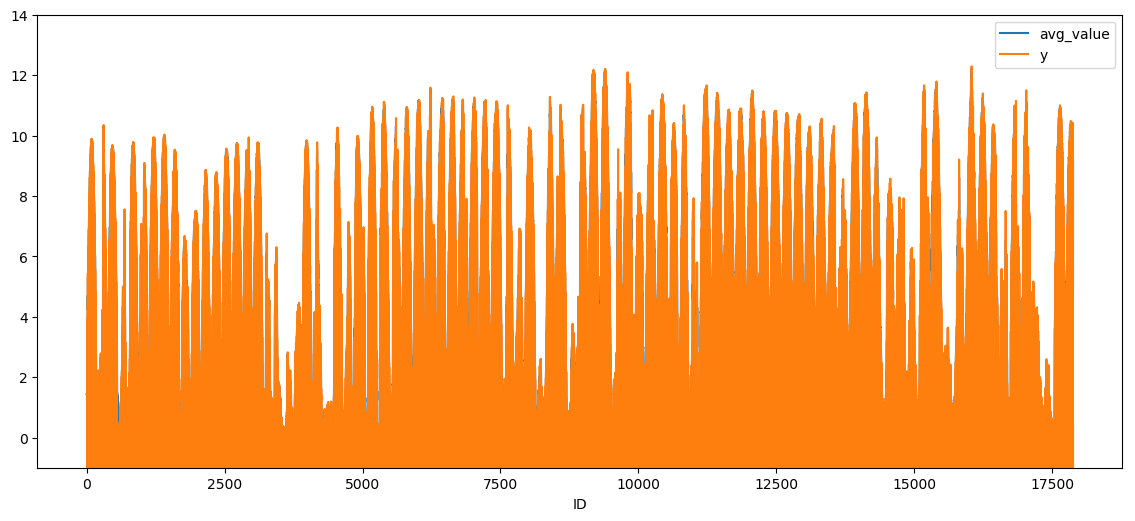

In [43]:
inter_y_id=df

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

inter_y_id.plot(x='ID',y='avg_value',ax=ax)
inter_y_id.plot(x='ID',y='y',ylim=(-1,14),ax=ax)

plt.show()


In [34]:
df.avg_value.describe()

count    17409.000000
mean         5.690951
std          3.431096
min          0.008512
25%          2.511387
50%          5.710151
75%          8.842590
max         12.227251
Name: avg_value, dtype: float64

In [19]:
train = df[df['is_train']==1]
test = df[df['is_train']==0]

In [20]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.08,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': 0
}

predictor = [c for c in train.columns.tolist() if c not in['y','is_train']]

test_predicts = []
val_preds = []

# log_test_predicts = []
# log_val_predicts = []
for idx, seed in enumerate([1,2,3,4,5]):
    kf = KFold(5, shuffle=True, random_state=seed)
    
    val_preds.append(np.zeros(train.shape[0]))
    for n_fold, (tra_idx, val_idx) in enumerate(kf.split(train)):
        tra = train.iloc[tra_idx]
        val = train.iloc[val_idx]

        train_set = lightgbm.Dataset(
            tra[predictor],
            tra['y']
        )

        validation_set = lightgbm.Dataset(
            val[predictor],
            val['y']
        )

        model = lightgbm.train(params, train_set, num_boost_round=5000,
                              valid_sets= [validation_set],
                              valid_names=['valid'],
                              early_stopping_rounds=100,
                               feval=my_val,
                              verbose_eval=500)

        val_preds[idx][val_idx] = model.predict(val[predictor])
        test_predicts.append(model.predict(test[predictor]))

print('local cv:',1/(1+np.sqrt(mean_squared_error(train['y'],np.mean(val_preds,axis=0)))))

Training until validation scores don't improve for 100 rounds.
[500]	valid's l2: 0.0561782	valid's score: 0.808395
Early stopping, best iteration is:
[622]	valid's l2: 0.056137	valid's score: 0.808452
Training until validation scores don't improve for 100 rounds.
[500]	valid's l2: 0.0184037	valid's score: 0.880545
Early stopping, best iteration is:
[606]	valid's l2: 0.0182689	valid's score: 0.880931
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[172]	valid's l2: 0.0131367	valid's score: 0.89717
Training until validation scores don't improve for 100 rounds.
[500]	valid's l2: 0.0407441	valid's score: 0.832049
[1000]	valid's l2: 0.039119	valid's score: 0.834874
[1500]	valid's l2: 0.0387643	valid's score: 0.835501
Early stopping, best iteration is:
[1730]	valid's l2: 0.0387178	valid's score: 0.835583
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[213]	valid's l2: 0.0162736	valid's score:

In [26]:
pd.Series(model.feature_importance(importance_type='gain'),
          index=model.feature_name()).sort_values(ascending=False).head(40)

P_A                 213149.607026
I_A                  78529.501081
I_C                  56092.202971
P_avg                42472.512904
avg_value            19700.462062
P_C                  18021.842621
P_B                  11941.301616
I_B                   7474.480137
prev_value            1379.436493
interpolation_ls       361.001004
light_strength         187.626057
next_value             145.070258
efficiency_C           123.407627
V_B                    111.922425
board_t                109.518282
wind_direction          96.002370
efficiency              89.879717
prev_ls                 81.411088
V_A                     76.019131
next_ls                 64.085769
wind_speed              60.956039
efficiency_B            40.054368
V_C                     39.661732
env_t                   38.248736
efficiency_A            30.321828
magic_feature           24.418665
ID                      23.319929
interpolation_ID        19.547515
next_ID                 18.438956
prev_ID       

In [22]:
train.head(10)

,ID,board_t,env_t,light_strength,efficiency,efficiency_A,efficiency_B,efficiency_C,V_A,V_B,...,next_value,prev_value,avg_value,next_ID,prev_ID,next_ls,prev_ls,interpolation_ID,interpolation_ls,magic_feature
2,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,...,1.692575,NaN,1.692575,3,0,30,0,NaN,NaN,10
3,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,...,1.975787,1.437752,1.706770,4,2,41,34,3.858913,1.168734,11
4,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,...,2.370656,1.692575,2.031615,6,3,53,30,3.726817,2.003362,12
6,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,...,2.532091,1.975787,2.253939,7,4,65,41,3.830134,2.242813,14
7,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,...,2.779719,2.370656,2.575187,8,6,76,53,4.211441,2.575187,15
8,16,-14.10,-16.2,76,61.97,77.59,25.80,82.53,733,728,...,3.832378,2.532091,3.182235,11,7,96,65,5.457736,2.979065,16
11,19,-11.25,-15.9,96,71.51,70.09,70.09,74.35,726,726,...,3.956692,2.779719,3.368205,12,8,100,76,6.016394,3.721297,19
12,20,-10.77,-15.8,100,70.04,69.27,68.43,72.42,726,720,...,5.440741,3.832378,4.636559,14,11,100,96,8.657466,5.119068,20
14,22,-10.77,-15.8,100,5699.37,16924.86,162.65,10.59,65382,7,...,4.501339,3.956692,4.229016,16,12,122,100,5.318310,3.956692,22
16,24,-8.33,-14.7,122,63.99,62.47,62.96,66.53,721,717,...,5.135805,5.440741,5.288273,19,14,142,100,4.830870,5.284727,24


In [23]:
test['ans'] = np.mean(test_predicts, axis=0)

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
test[['ID','ans']].to_csv('../result/080201.csv',header=False, index=False)

In [27]:
test.interpolation_ls.describe()

count    8385.000000
mean             NaN
std              NaN
min             -inf
25%         2.389185
50%         5.681035
75%         8.873646
max              inf
Name: interpolation_ls, dtype: float64